![Astrofisica Computacional](../logo.PNG)

---
## 03. Ecuaciones Diferenciales Parciales IV. Ecuaciones Hiperbólicas No-Lineales

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

Se presentarán algunos de los efectos de la no linealidad en las ecuaciones diferenciales parciales hiperbólicas.


---

##  La Ecuación de Advección Lineal 1-D

Muchos sistemas de PDEs hiperbólicos (como por ejemplo las ecuaciones de la hidrodinámica) pueden ser escritas en la forma de un sistema (lineal o no-lineal) de ecuaciones de advección, por lo que el estudio de este tipo de ecuaciones provee información imortante para sistemas mas complejos.

La ecuación lineal de advección unidimensional es

\begin{equation}
\partial_t \psi + v \partial_x \psi = 0
\end{equation}

donde $\psi(t,x)$ es una función escalar y $v$ es la velocidad constante con la que se advecta el perfil inicial (si $v > 0$ la advección se da de izquierda a derecha). Un ejemplo de esta ecuación corresponde a la **Ecuación de Continuidad**.

Como ya se ha mostrado, la solución de esta ecuación simplemente toma el perfil inicial, $\psi(t=0,x)$, y lo desplaza con rapidez $v$.  La forma del perfil inicial se preserva durante la advección.

Una sustitución directa muestra que $\psi(x - vt)$ es una solución de la ecuación de advección para cualquier perfil $\psi$. Esto significa que la solución es constante a lo largo de las lineas $x = v t$ (las curvas a lo largo de las cuales la solución es constante se denominan **curvas características**).

<center>
<a href="https://imgbb.com/"><img src="https://i.ibb.co/vZJvXcJ/advectioncharact.jpg" alt="advectioncharact" width='500'></a>
</center>



---

## PDEs Hiperbólicas No-Lineales. Ecuación de Burguer.

Considere ahora la ecuación de movimiento para un fluido en ausencia de viscosidad, campos magnéticos y otras fuerzas externas,

\begin{equation}
\rho \left( \frac{\partial \vec{v}}{\partial t} +  \vec{v} \cdot \vec{\nabla} \vec{v}\right) = - \vec{\nabla} P .
\end{equation}

Si además se considera que el fluido no tiene presión interna (gas de partículas no interactuantes o polvo), la ecuación se convierte en

\begin{equation}
\frac{\partial \vec{v}}{\partial t} +  \vec{v} \cdot \vec{\nabla} \vec{v}=  0.
\end{equation}

Esta relación se denomina **Ecuación de Burguer** y es la más simple de las **PDEs hiperbólicas no-lineales**. En términos de una función general $\psi = \psi(t,x)$ en una dimensión, se convierte en

\begin{equation}
\partial_t \psi + \psi \partial_x \psi = 0.
\end{equation}

Se puede apreciar que esta es casi identica a la ecuación de advección tratada anteriormente, excepto porque la velocidad **NO es constante** sino que corresponde al mismo campo $\psi$ que se quiere encontrar. 

**Es decir, $\psi$ es al mismo tiempo la función que se advecta y la rapidez con la cual se mueve**.

---

### 1. Choques

Como se mostró arriba, en el caso de la ecuación de advección lineal, la solución es constante a lo largo de las líneas $x = vt + x_0$, las cuales son paralelas (porque $v$ es constante).  

En el caso de la ecuación de Burger la velocidad no es constante y por ello las curvas características estarán dadas ahora por la condición $\frac{dx}{dt} = \psi$, con $x(0) = x_0$.  
Debido a que $\psi = \psi(t,x)$, esta ecuación no se puede integrar inmediatamente.

Si se toma $\psi_0 = \psi(t=0)$, entonces se puede analizar como se comportan las curvas características en un pequeño intervalo temporal (antes de que $\psi(x,t)$ cambie significativamente).

<center>
<img src="https://i.ibb.co/brNg0WN/burguerscharact.jpg" alt="burguerscharact" width="500">
</center>



De este comportamiento se nota que después de un corto intervalo temporal, las curvas características se intersecan. A partir de este punto de intersección,
$(t_s, x_s)$, no es posible recuperar la información hacia atrás en el tiempo para encontrar un único estado inicial (es decir, se perdió la causalidad del sistema). 

Esta unión de las curvas características en el plano $t$-$x$  se denomina un **choque**, y es una de las formas en las que los problemas no-lineales difieren de los lineales.

<center><img src="https://i.ibb.co/8YHFfWD/burguershock.jpg" alt="burguershock" width="500"></center>

FTCS Method
dt =  0.02
dx =  0.1001001001001001


/var/folders/rg/9mmttz3x0hz3mvcrk2c92x_h0000gn/T/ipykernel_32614/1474794324.py:26: RuntimeWarning: overflow encountered in double_scalars
  psi[n+1,j] = psi[n,j] - ((psi[n,j]*dt)/(2*dx))*(psi[n,j+1] - psi[n,j-1])
/var/folders/rg/9mmttz3x0hz3mvcrk2c92x_h0000gn/T/ipykernel_32614/1474794324.py:26: RuntimeWarning: invalid value encountered in double_scalars
  psi[n+1,j] = psi[n,j] - ((psi[n,j]*dt)/(2*dx))*(psi[n,j+1] - psi[n,j-1])


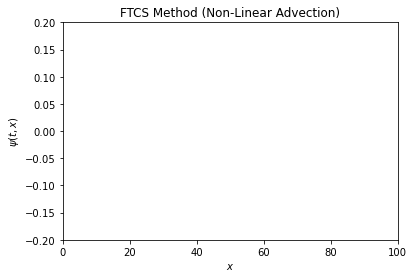

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline


# Definition of the initial Sin profile
def sinProfile(x):
    return (1/8.)*np.sin(2*np.pi*x/x_f)


# FTCS Method for the Non-Linear advection equation
def FTCS_NL(psi0, tgrid, xgrid, boundary='outflow'):
    print('FTCS Method')
    dt = tgrid[1] - tgrid[0]
    dx = xgrid[1] - xgrid[0]
    print('dt = ', dt)
    print('dx = ', dx)
    
    psi = np.zeros([len(tgrid), len(xgrid)])
    psi[0] = psi0(xgrid) # initial condition
    
    for n in range(len(tgrid)-1):
        for j in range(1,len(xgrid)-1):
            psi[n+1,j] = psi[n,j] - ((psi[n,j]*dt)/(2*dx))*(psi[n,j+1] - psi[n,j-1])
        if boundary=='outflow': # Outflow boundary conditions
            psi[n+1,0] = psi[n+1,1]
            psi[n+1,-1] = psi[n+1,-2]
        else: # Periodic boudnary conditions
                psi[n+1,0] = psi[n+1,-2]
                psi[n+1,-1] = psi[n+1,-2]
    return psi


# Definition of the grids
x_i = 0.
x_f = 100.
xgrid = np.linspace(x_i, x_f, 1000)
dx = xgrid[1] - xgrid[0]

t_i = 0.
t_f = 150.
dt = 0.02
tgrid = np.arange(t_i, t_f, dt)

    
psi = FTCS_NL(sinProfile, tgrid, xgrid)

# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.title('FTCS Method (Non-Linear Advection)')

ax.set_xlim(( 0, 100))
ax.set_ylim((-0.2, 0.2))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\psi(t,x)$')

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = xgrid
    step = int(len(tgrid)/200)
    y = psi[step*i,:] # We take only some of the frames (given by 50*i)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 ms each
                               blit=True)

HTML(anim.to_jshtml())

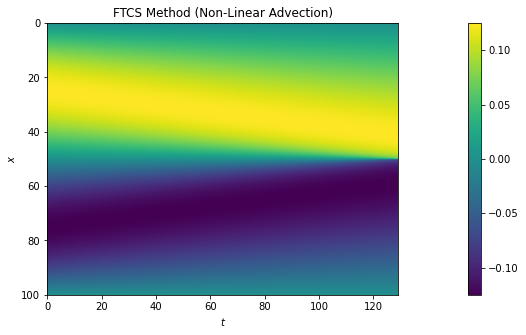

In [5]:
tplot_i = 0
tplot_f = 129
# Plot
plt.figure(figsize=(25,5))
plt.title('FTCS Method (Non-Linear Advection)')
plt.imshow(psi[int(tplot_i/dt):int(tplot_f/dt)].T, extent=[tplot_i, tplot_f, x_f, x_i])
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.colorbar()
plt.show()

---
### 2. Rarefacción

Otro tipo de efecto típico en los sistemas no-lineales es el de la **rarefacción**.  La siguiente figura muestra un conjunto de condiciones iniciales que implica una velocidad de advección pequeña al lado izquierdo y una velocidad grande al lado derecho. 


<center><img src="https://i.ibb.co/bXz2TLN/burguerscharact2.jpg" alt="burguerscharact2" width="500"></center>

En este caso las curvas características no convergen sino que divergen con la evolución temporal.

<center><img src="https://i.ibb.co/n0k0qBs/burguersrarefaction.jpg" alt="burguersrarefaction" width="500"></center>


FTCS Method
dt =  0.02
dx =  0.20040080160320642


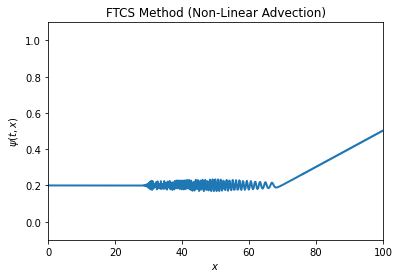

In [10]:
# Definition of the initial TopHat profile
def topHat(x):
    f =np.zeros_like(x)
    for i in range(len(x)):
        if x[i]<50:
            f[i]=0.2
        else:
            f[i]=1.0
    return f

# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 500 # Try with 1000 and 5000 to se that much is not always better!
xgrid = np.linspace(x_i, x_f, Nx)
dx = xgrid[1] - xgrid[0]

t_i = 0.
t_f = 100.
dt = 0.02
tgrid = np.arange(t_i, t_f, dt)


psi = FTCS_NL(topHat, tgrid, xgrid)

# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.title('FTCS Method (Non-Linear Advection)')
ax.set_xlim(( 0, 100))
ax.set_ylim((-0.1, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\psi(t,x)$')

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = xgrid
    step = int(len(tgrid)/200)
    y = psi[step*i,:] # We take only some of the frames (given by 50*i)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 ms each
                               blit=True)

HTML(anim.to_jshtml())

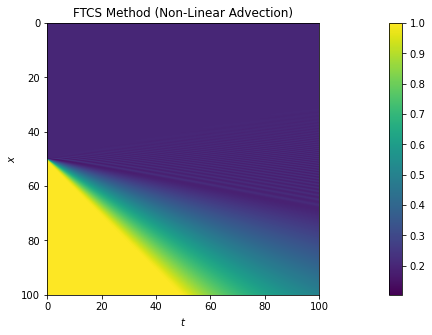

In [7]:
tplot_i = 0
tplot_f = 100
# Plot
plt.figure(figsize=(25,5))
plt.title('FTCS Method (Non-Linear Advection)')
plt.imshow(psi[int(tplot_i/dt):int(tplot_f/dt)].T, extent=[tplot_i, tplot_f, x_f, x_i])
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.colorbar()
plt.show()